In [192]:
import numpy as np
import matplotlib.pyplot as plt
import math

### variables

In [193]:
delta = 0.05
n = 1000
prob = np.arange(0.0000001, delta+1, delta)

In [194]:
np.random.seed(seed=42)

### Helper functions

In [195]:
def closest_point_binary_search(points, target):
    left, right = 0, len(points) - 1

    while left <= right:
        mid = (left + right) // 2
        print(left, right, mid)
        if points[mid] == target:
            return points[mid]

        if points[mid] < target:
            left = mid + 1
        else:
            right = mid - 1

    # At this point, left and right have crossed, and 'left' points to the closest point.
    # You can choose either 'left' or 'right' based on your preference.

    if left == 0:
        return points[left]
    elif right == len(points) - 1:
        return points[right]
    else:
        # Check which of the two closest points is actually closer
        return min(points[left], points[right], key=lambda x: abs(x - target))



### Functions

In [196]:
def hoeffding():
    epsilon = math.sqrt(math.log(1/delta)/(2*n))
    print("Epsilon: ", epsilon)
    values = []
    for i in prob:
        i = i + epsilon
        values.append(i)
    return values

def pinkser(x):
    a = (math.log((x+1)/delta)) / (2*n)
    return x + a

def pinsker_inequality(data):
    values = []
    for i in data:
        i = pinkser(i)
        values.append(i)
    return values

def refined_pinkser(x):
    a = math.sqrt(  ( 2 * x * math.log((n+1) / delta ) )/(n)  )
    b = ( 2 * math.log((n+1)/delta)) / (n)
    return x + a + b

def refined_pinsker_inequality(data):
    values = []
    for i in data:
        i = refined_pinkser(i) 
        values.append(i)
    return values

### Plots

Epsilon:  0.038702275602049495


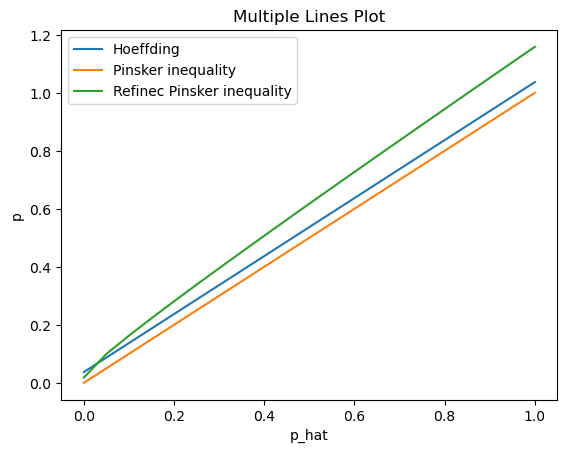

In [197]:
# Plotting the data
plt.plot(prob, hoeffding(), label='Hoeffding')
plt.plot(prob, pinsker_inequality(prob), label='Pinsker inequality')
plt.plot(prob, refined_pinsker_inequality(prob), label='Refinec Pinsker inequality')

# Adding labels and title
plt.xlabel('p_hat')
plt.ylabel('p')
plt.title('Multiple Lines Plot')
plt.legend()

plt.show()

Epsilon:  0.038702275602049495


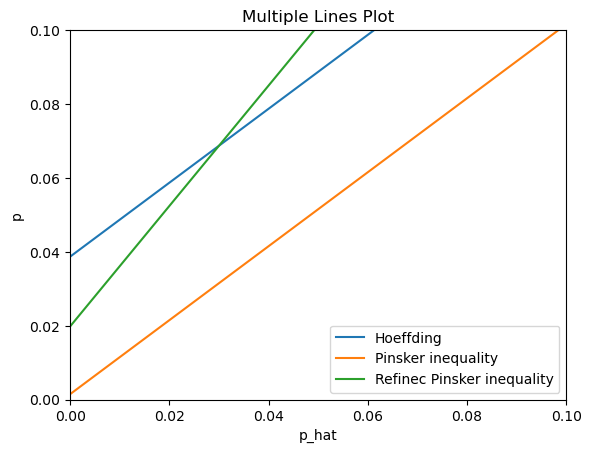

In [198]:
# Plotting the data
plt.plot(prob, hoeffding(), label='Hoeffding')
plt.plot(prob, pinsker_inequality(prob), label='Pinsker inequality')
plt.plot(prob, refined_pinsker_inequality(prob), label='Refinec Pinsker inequality')

# Adding labels and title
plt.xlabel('p_hat')
plt.ylabel('p')
plt.xlim(0.0, 0.1)
plt.ylim(0.0, 0.1)
plt.title('Multiple Lines Plot')
plt.legend()

plt.show()

Epsilon:  0.038702275602049495
Epsilon:  0.038702275602049495


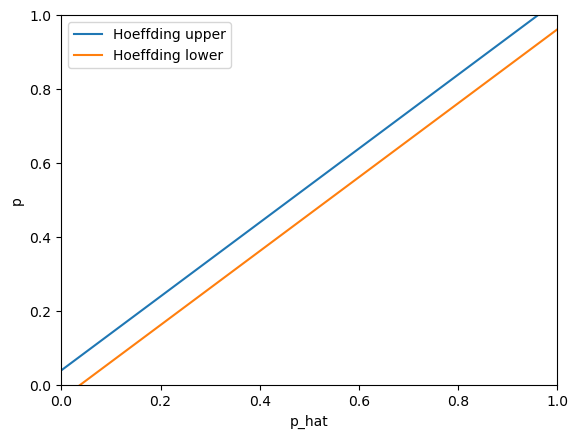

: 

In [199]:
def hoeffding_():
    epsilon = math.sqrt(math.log(1/delta)/(2*n))
    print("Epsilon: ", epsilon)
    values = []
    for i in prob:
        i = i - epsilon
        values.append(i)
    return values

# Plotting the data
plt.plot(prob, hoeffding(), label='Hoeffding upper')
plt.plot(prob, hoeffding_(), label='Hoeffding lower')

# Adding labels and title
plt.xlabel('p_hat')
plt.ylabel('p')
plt.xlim(0.0, 1)
plt.ylim(0.0, 1)
plt.legend()

plt.show()